# scipy.stats
#### Alberto Torres Barrán

`scipy.stats` es un módulo de `scipy` que contiene herramientas estadísticas y distribuciones de probabilidad. Lista completa de funciones y distribuciones: [referencia](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [1]:
import scipy
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('Scipy version', scipy.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

%matplotlib inline

Scipy version 1.1.0
Numpy version 1.15.4
Pandas version 0.23.4


### Distribuciones de probabilidad

Cada distribución está representada por un objeto, que incluye distintos métodos como la PDF, CDF, generación de números aleatorios, etc. Por ejemplo, `scipy.stats.norm` representa la distribución normal

In [8]:
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999), 100)
y = stats.norm.pdf(x)

In [9]:
# generación de numeros aleatorios
sample = stats.norm.rvs(size=10000)

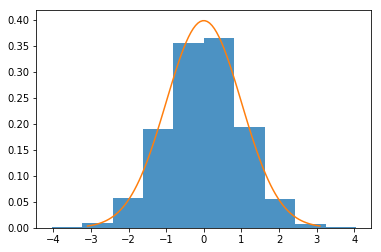

In [10]:
plt.hist(sample, density=True, alpha=0.8)
plt.plot(x, y);

Si sabemos que una muestra ha sido generada con algún proceso en particular, se puede realizar un ajuste para obtener los parámetros óptimos. El resultado es una tupla con los parámetros que definen la distribución

In [5]:
stats.norm.fit(sample)

(-0.00508304785645699, 1.0012342575236213)

La media es un estimador del centro de la distribución

In [6]:
np.mean(sample)

-0.00508304785645699

La mediana es otro estimador de centralidad, menos sensible a valores extremos

In [7]:
np.median(sample)

0.0005518137879214891

La mediana es también el percentil 50

In [8]:
stats.scoreatpercentile(sample, 50)

0.0005518137879214891

In [9]:
stats.scoreatpercentile(sample, 90)

1.2897080633454936

### Test estadísticos

In [10]:
a = stats.norm.rvs(0, 1, size=1000)
b = stats.norm.rvs(1, 1, size=1000)

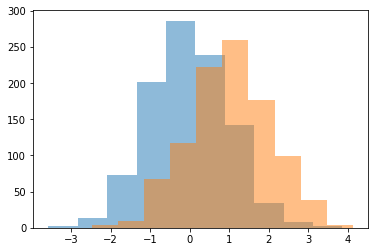

In [11]:
plt.hist(a, alpha=0.5)
plt.hist(b, alpha=0.5);

Podemos hacer un test estadístico para comparar si las medias de las distribuciones a y b son distintas. El t-test solo se aplica cuando ambas muestras:
   * son independientes
   * distribución normal
   * tienen el mismo tamaño
   * tiene la misma varianza (sino hay que pasar el parámetro `equal_var=False`)

In [12]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-22.83508309189098, pvalue=9.656194839000712e-103)

El pvalor es muy pequeño, por lo que la probabilidad que que ambas medias sean iguales es muy baja

In [13]:
brain = pd.read_csv('../data/brain_size.csv', sep=';', index_col=0)

In [14]:
brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


Vamos a comprobar si el valor esperado de la variable VIQ es igual a 0:

In [15]:
stats.ttest_1samp(brain['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

También podemos comprobar si hay diferencias significativas en el valor esperado entre hombres y mujeres

In [16]:
viq = brain.groupby('Gender')['VIQ']
stats.ttest_ind(viq.get_group('Male'), viq.get_group('Female'))

Ttest_indResult(statistic=0.7726161723275011, pvalue=0.44452876778583217)

En este caso se acepta la hipótesis nula ya que el p-valor es muy grande, lo que indica que no hay diferencias significativas (las medias son iguales).

FSIQ y PIQ son dos medidas distintas del coeficiente intelectual (CI) de una persona

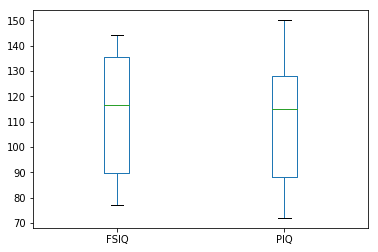

In [17]:
brain[['FSIQ', 'PIQ']].plot(kind='box');

Podemos comprobar si estas dos medidas son diferentes:

In [18]:
stats.ttest_ind(brain['FSIQ'], brain['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

El problema es que ambas variables no son independientes, ya que están medidas sobre los mismos individuos. En ese caso podemos usar una variante del t-test:

In [19]:
stats.ttest_rel(brain['FSIQ'], brain['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

En este caso la probabilidad de la hipótesis nula (las medias son iguales) es de 0.082. De acuerdo con el humbral típico, 0.05, en este caso no podríamos rechazar la hipótesis nula y por tanto ambas medias son iguales.

Es importante destacar que este test asume que las muestras tienen distribución normal. Podríamos comprobarlo haciendo un test de "normalidad". Scipy implementa varios, por ejemplo el test  de D'Agostino-Pearson (`scipy.stats.normaltest`), Shapiro-Wilk (`scipy.stats.shapiro`) y Anderson-Darling (`scipy.stats.anderson`)

In [20]:
stats.normaltest(brain['FSIQ'])

NormaltestResult(statistic=97.17860058228965, pvalue=7.9056030485172075e-22)

In [21]:
stats.normaltest(brain['PIQ'])

NormaltestResult(statistic=11.681588179999903, pvalue=0.002906533659856713)

En este caso la hipótesis nula es que la muestra procede de una distribución normal. Ambos p-valores son muy pequeños, por lo que rechazaríamos esta hipótesis y por tanto las muestras no son normales. Los correspondientes gráficos quantil-quantil:

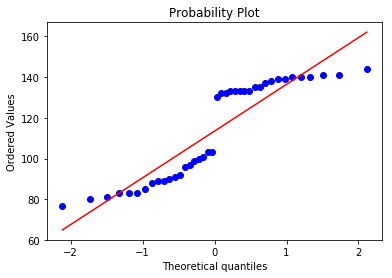

In [22]:
stats.probplot(brain['FSIQ'], dist="norm", plot=plt);

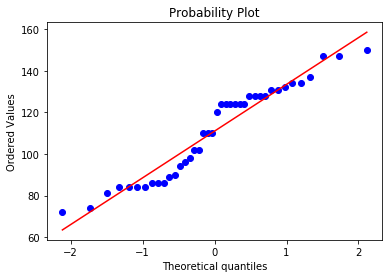

In [23]:
stats.probplot(brain['PIQ'], dist="norm", plot=plt);

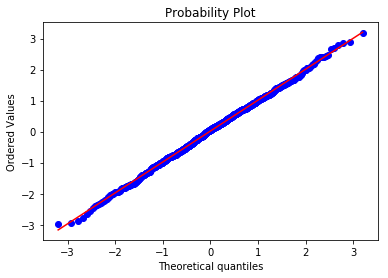

In [24]:
stats.probplot(stats.norm.rvs(size=1000), dist="norm", plot=plt);

La versión no-paramétrica (no asumen distribución normal) del t-test para muestras independientes sería el [test de Mann-Whitney](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) (`scipy.stats.mannwhitneyu`) mientras que para muestras dependientes sería el [test de Wilcoxon](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) (`scipy.stats.wilcoxon`) 

In [25]:
stats.wilcoxon(brain['FSIQ'], brain['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

Este test aumenta la evidencia en contra de rechazar la hipótesis nula, y por tanto concluiríamos que ambas medias son iguales 

Algunos ejemplos de otros test útiles son los de independencia para variables continuas ([Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), `scipy.stats.ks_2samp`) y para variables categóricas ([Pearson's chi-squared](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#Testing_for_statistical_independence), `scipy.stats.chi2_contingency`).

La lista completa de tests estadísticos y otras herramientas se puede consultar en la [documentación](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions). 

#### Ejercicio test